In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from copy import deepcopy
%matplotlib inline

In [181]:
compensation = pd.read_csv('hourly_compensation.csv')
compensation.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
0,Australia,8.44,9.76,9.94,9.27,9.80,8.18,8.55,9.52,11.44,...,16.709999,15.110000,15.940000,14.410000,13.33,15.400000,19.790001,23.379999,25.110001,26.139999
1,Austria,8.87,7.77,7.76,7.79,7.35,7.57,10.72,13.65,14.49,...,21.850000,22.020000,21.629999,19.120001,19.07,20.660000,25.420000,28.389999,29.360001,30.459999
2,Belgium,11.74,10.28,8.93,8.53,7.98,8.21,11.25,13.96,14.72,...,22.280001,22.620001,22.139999,20.129999,19.84,21.770000,26.549999,30.010000,30.790001,31.850000
3,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.770000,5.490000,3.390000,3.500000,2.97,2.570000,2.740000,3.140000,4.160000,4.910000
4,Canada,8.87,9.79,10.70,11.41,11.41,11.20,11.33,12.30,13.77,...,16.830000,15.930000,16.100000,16.480000,16.27,16.799999,19.600000,21.850000,23.980000,25.740000


In [182]:
weekly_hours = pd.read_csv('hours_worked_per_week.csv')
weekly_hours.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,Unnamed: 29
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Australia,34.578846,34.578846,34.376923,34.117307,34.415384,34.338461,34.482692,34.655769,34.819230,...,34.363462,34.332693,33.742307,33.467309,33.411539,33.596154,33.298077,33.140386,33.109614,NaN
2,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.492307,31.378845,31.351924,31.384615,31.567308,31.736539,31.844231,31.817308,31.761346,NaN
3,Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Belgium,NaN,NaN,NaN,34.000000,34.480769,34.596154,34.211538,33.903846,33.653846,...,30.403846,29.884615,30.326923,30.365385,30.288462,29.788462,30.096154,30.211538,30.115385,NaN


In [183]:
trade_balance = pd.read_csv('trade_balance.csv')
trade_balance.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-1.555555e+07,-1.999999e+07,-24444430.22,-5.777779e+07,-7.333330e+07,-102222210.8,-139999994.3,-1.244444e+08,-86666672.36,...,-1.346906e+09,-2.330684e+09,-2.698376e+09,-3.139072e+09,-3.360200e+09,-3.977873e+09,-3.831084e+09,-6.096070e+09,-6.565330e+09,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.170065e+09,-1.427486e+09,-1.624591e+09,-2.014800e+09,-2.197351e+09,-2.803289e+09,-3.450694e+09,-3.088848e+09,-2.590635e+09,NaN
2,Algeria,-7.653547e+08,-5.176123e+08,-20510459.26,-3.281672e+08,-1.267222e+08,-101274850.3,40509940.1,6.076491e+07,-40509940.10,...,5.520554e+09,9.789367e+09,1.225881e+10,2.392325e+10,3.174253e+10,3.166455e+10,3.995169e+10,6.171963e+09,1.511871e+10,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
compensation = compensation.melt(id_vars=['country'], var_name='year', value_name='hourly_rate')
# compensation.dropna(subset=['hourly_rate']).head()

In [185]:
weekly_hours = weekly_hours.melt(id_vars=['country'], var_name='year', value_name='working_hours')
# weekly_hours
# weekly_hours.dropna(subset=['working_hours']).head()

In [186]:
trade_balance = trade_balance.melt(id_vars=['country'], var_name='year', value_name='trade_balance')

In [187]:
compensation = compensation.dropna(subset=['hourly_rate'])
weekly_hours = weekly_hours.dropna(subset=['working_hours'])
trade_balance = trade_balance.dropna(subset=['trade_balance'])

In [188]:
combined = compensation.merge(weekly_hours, on=['country','year'], how='inner').merge(trade_balance, on=['country','year'], how='inner')

In [189]:
combined[combined['country'] == 'United States']

,country,year,hourly_rate,working_hours,trade_balance
13,United States,1980,9.630000,34.807692,-1.300000e+10
27,United States,1981,10.620000,34.634615,-1.260000e+10
41,United States,1982,11.430000,34.557692,-2.000000e+10
59,United States,1983,11.840000,34.923077,-5.160000e+10
77,United States,1984,12.270000,35.269231,-1.027000e+11
95,United States,1985,12.710000,35.230769,-1.152000e+11
115,United States,1986,12.990000,35.096154,-1.326000e+11
136,United States,1987,13.300000,35.192308,-1.449000e+11
157,United States,1988,13.610000,35.250000,-1.101000e+11
178,United States,1989,14.040000,35.480769,-8.790000e+10


C:\Users\mackenzie.damavandi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\mackenzie.damavandi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mackenzie.damavandi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\mackenzie.damavandi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


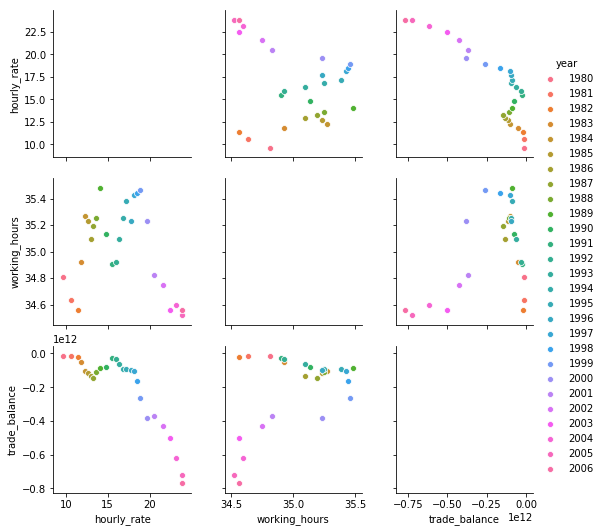

In [190]:
sns.pairplot(combined[combined['country'] == 'United States'], vars=['hourly_rate', 'working_hours', 'trade_balance'], hue='year')

In [191]:
countries = pd.concat([
    combined[combined['year'] == '1980'],
    combined[combined['year'] == '1985'],
    combined[combined['year'] == '1990'],
    combined[combined['year'] == '1995'],
    combined[combined['year'] == '2000'],
    combined[combined['year'] == '2005']
]).groupby(['country']).size()
test = combined[combined['year'].isin(['1980','1985','1990','1995','2000','2005'])]
final = test[test['country'].isin(list(countries.where(countries > 5).dropna().index))]
# list(countries)
#     .concat()
#     any([
#         ,
#         ,
#         combined['year'] == '1990',
#         combined['year'] == '1995',
#         combined['year'] == '2000',
#         combined['year'] == '2005'
#     ])
# ]

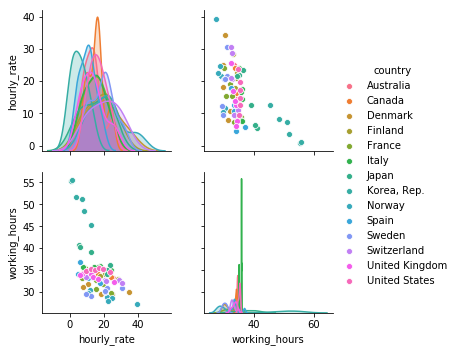

In [192]:
sns.pairplot(final, vars=['hourly_rate','working_hours'], hue='country')

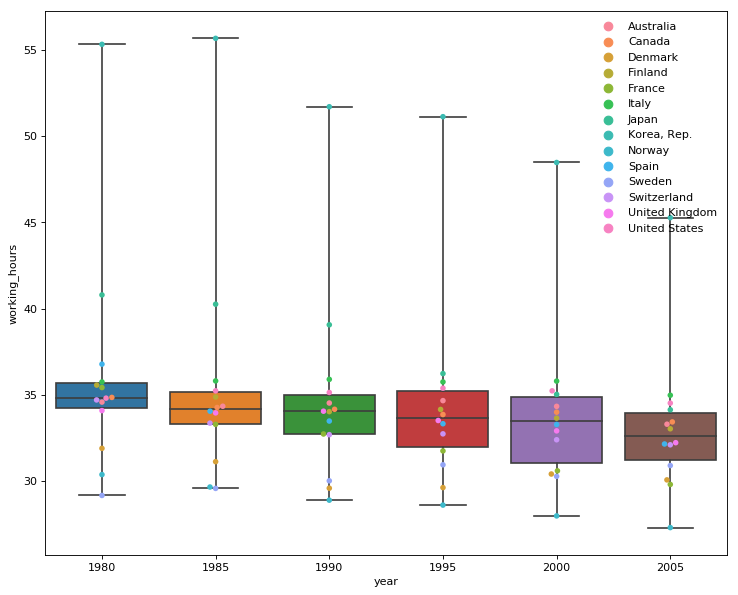

In [193]:
plt.figure(num=None, figsize=(11,9), dpi=80)
ax = sns.boxplot(x='year', y='working_hours', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='working_hours', hue='country', data=final)
l = ax.legend()
ax.legend(loc='best', frameon=False)

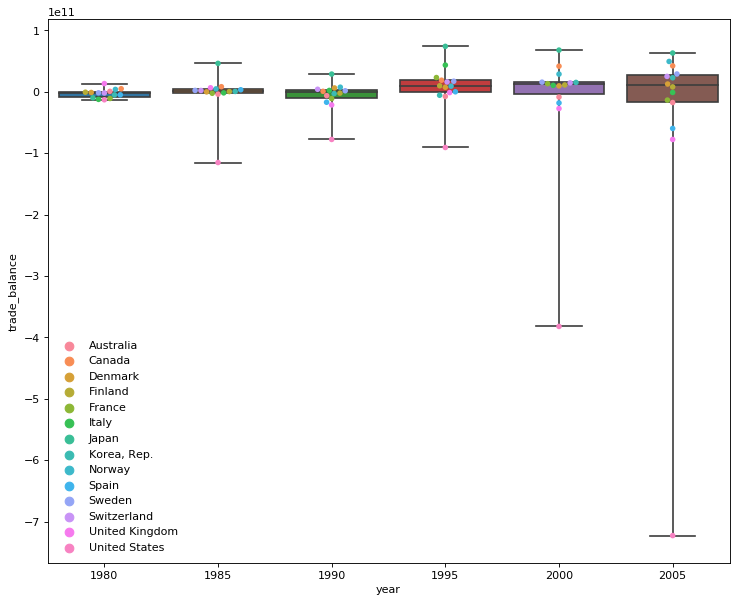

In [194]:
plt.figure(num=None, figsize=(11,9), dpi=80)
ax = sns.boxplot(x='year', y='trade_balance', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='trade_balance', hue='country', data=final)
l = ax.legend()
ax.legend(loc='best', frameon=False)

# plt.figure(num=None, figsize=(11,9), dpi=80)
# ax = sns.lineplot(x='year', y='trade_balance', data=final[final['country'].isin(['Spain'])])

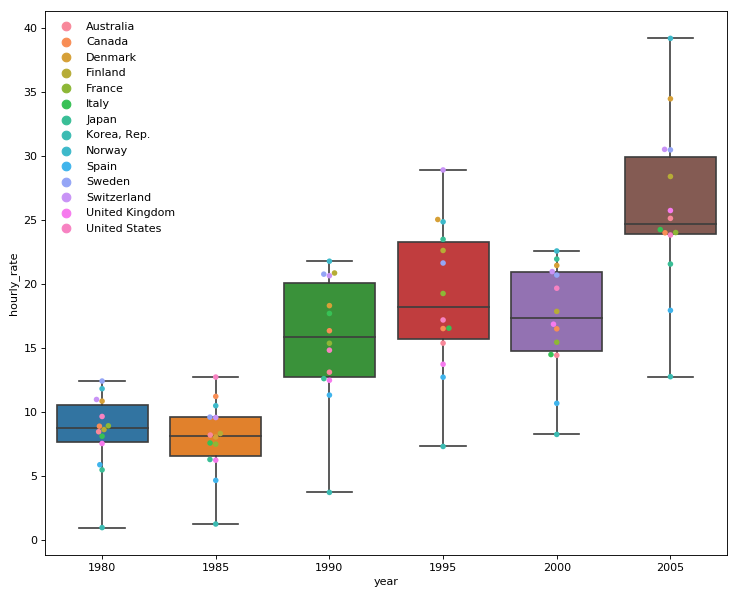

In [195]:
plt.figure(num=None, figsize=(11,9), dpi=80)
ax = sns.boxplot(x='year', y='hourly_rate', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='hourly_rate', hue='country', data=final)
l = ax.legend()
ax.legend(loc='best', frameon=False)

In [196]:
final.head()

,country,year,hourly_rate,working_hours,trade_balance
0,Australia,1980,8.44,34.578846,7.231198e+08
1,Canada,1980,8.87,34.849999,4.982894e+09
2,Denmark,1980,10.83,31.898076,-1.127593e+09
3,Finland,1980,8.61,35.563462,-6.981192e+08
4,France,1980,8.90,35.423077,-1.088140e+10


In [197]:
trade = deepcopy(final.pivot(index='country', columns='year', values='trade_balance'))

In [198]:
(trade.iloc[:,1] - trade.iloc[:,0]) / trade.iloc[:,0] * 100

country
Australia        -622.630387
Canada             66.104701
Denmark           -86.893669
Finland          -153.592079
France            -77.666403
Italy             -85.759161
Japan            -572.873202
Korea, Rep.      -111.329404
Norway             21.655859
Spain            -167.066453
Sweden           -235.735505
Switzerland      -209.780932
United Kingdom    -51.123095
United States     786.153846
dtype: float64

In [199]:
i = 1
trade_delta = {}
year_list = ['1985','1990','1995','2000','2005']
while i < len(trade.iloc[0]):
    trade_delta[year_list[i-1]] = (trade.iloc[:,i] - trade.iloc[:,i-1]) / 5
    #(trade.iloc[:,i] - trade.iloc[:,i-1]) / abs(trade.iloc[:,i-1]) * 100
    i += 1

In [200]:
#del(trade_delta)

In [201]:
# print(trade[trade.index == 'Spain']['1990'])
# print(trade[trade.index == 'Spain']['1995'])
# print((trade[trade.index == 'Spain']['1995'] - trade[trade.index == 'Spain']['1990']))
# (trade[trade.index == 'Spain']['1995'] - trade[trade.index == 'Spain']['1990']) / abs(trade[trade.index == 'Spain']['1990']) * 100
# trade_delta
pd.DataFrame(trade_delta).mean(axis=1)

country
Australia        -7.293007e+08
Canada            1.489633e+09
Denmark           5.507174e+08
Finland           3.484242e+08
France           -1.059069e+08
Italy             4.502798e+08
Japan             2.915929e+09
Korea, Rep.       1.114875e+09
Norway            1.820522e+09
Spain            -2.189712e+09
Sweden            1.225736e+09
Switzerland       1.079782e+09
United Kingdom   -3.639617e+09
United States    -2.838800e+10
dtype: float64

In [202]:
wage = deepcopy(final.pivot(index='country', columns='year', values='hourly_rate'))
work = deepcopy(final.pivot(index='country', columns='year', values='working_hours'))

i = 1
wage_delta = {}
work_delta = {}
while i < len(trade.iloc[0]):
    wage_delta[year_list[i-1]] = (wage.iloc[:,i] - wage.iloc[:,i-1]) / abs(wage.iloc[:,i-1]) * 100
    work_delta[year_list[i-1]] = (work.iloc[:,i] - work.iloc[:,i-1]) / abs(work.iloc[:,i-1]) * 100
    i += 1

In [212]:
print(pd.DataFrame(wage_delta).mean(axis=1).idxmax())
print(pd.DataFrame(work_delta).mean(axis=1).idxmin())

Korea, Rep.
Korea, Rep.


In [204]:
# for line in range(0,final.shape[0]):
#     print(line+0.2, final.working_hours[line])
final = final.reset_index(drop=True)

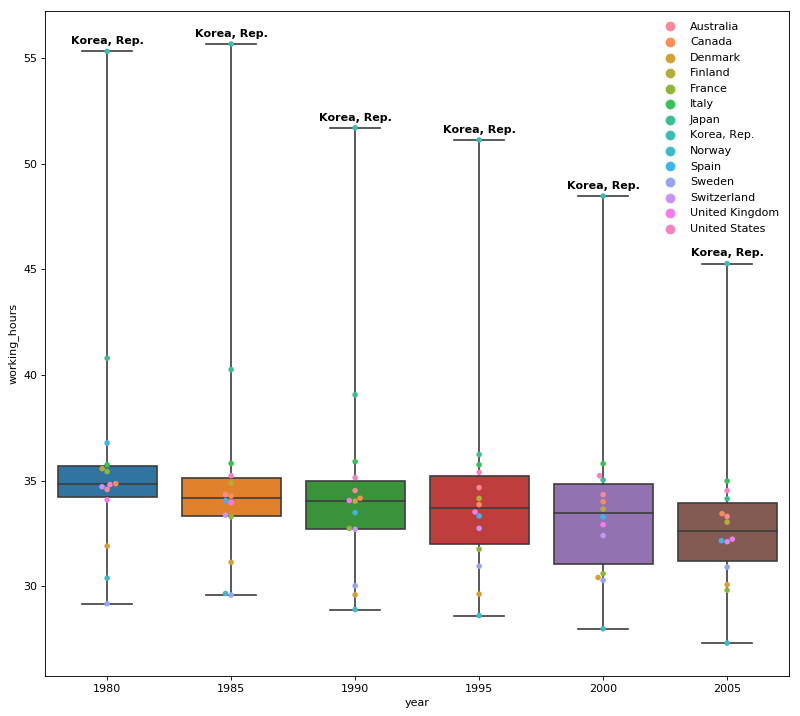

In [205]:
plt.figure(num=None, figsize=(12,11), dpi=80)
ax = sns.boxplot(x='year', y='working_hours', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='working_hours', hue='country', data=final)
for line in range(0,final[final.country == 'Korea, Rep.'].shape[0]):
    ax.text(line, final[final.country == 'Korea, Rep.'].working_hours.iloc[line]+.35, 'Korea, Rep.', horizontalalignment='center', size='medium', color='black', weight='semibold')
# ax.text(3+0.2, 55, 'Korea, Rep.')
l = ax.legend()
ax.legend(loc='best', frameon=False)

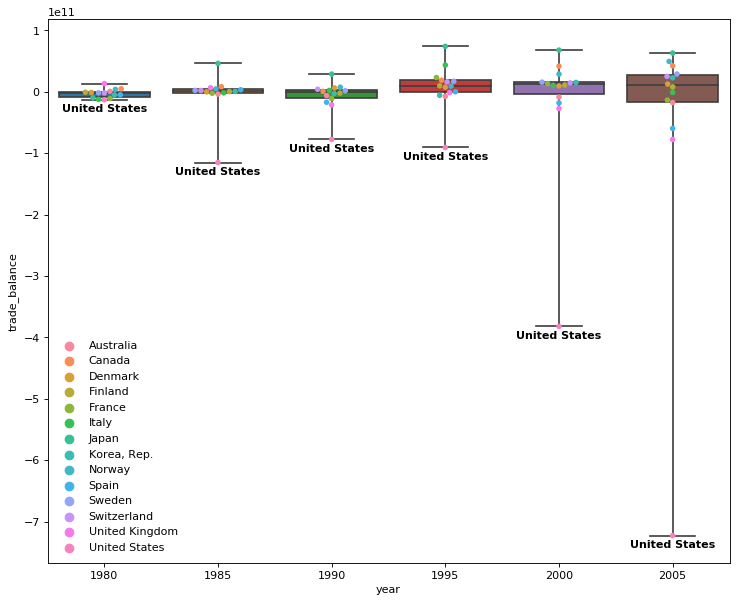

In [206]:
plt.figure(num=None, figsize=(11,9), dpi=80)
ax = sns.boxplot(x='year', y='trade_balance', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='trade_balance', hue='country', data=final)
for line in range(0,final[final.country == 'United States'].shape[0]):
    ax.text(line, final[final.country == 'United States'].trade_balance.iloc[line]-20000000000, 'United States', horizontalalignment='center', size='medium', color='black', weight='semibold')
l = ax.legend()
ax.legend(loc='best', frameon=False)

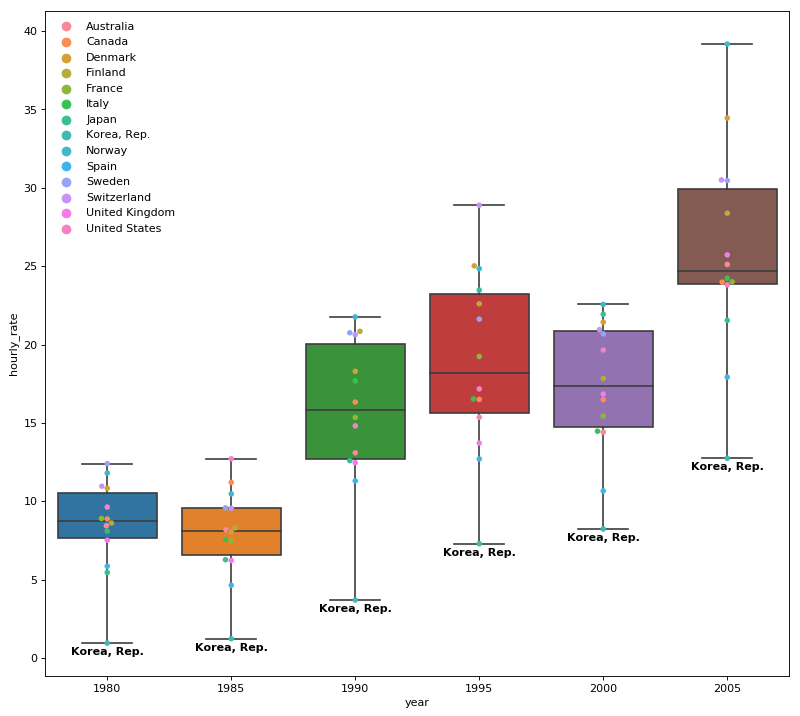

In [216]:
plt.figure(num=None, figsize=(12,11), dpi=80)
ax = sns.boxplot(x='year', y='hourly_rate', data=final, whis=np.inf)
ax = sns.swarmplot(x='year', y='hourly_rate', hue='country', data=final)
for line in range(0,final[final.country == 'Korea, Rep.'].shape[0]):
    ax.text(line, final[final.country == 'Korea, Rep.'].hourly_rate.iloc[line]-.75, 'Korea, Rep.', horizontalalignment='center', size='medium', color='black', weight='semibold')
# ax.text(3+0.2, 55, 'Korea, Rep.')
l = ax.legend()
ax.legend(loc='best', frameon=False)

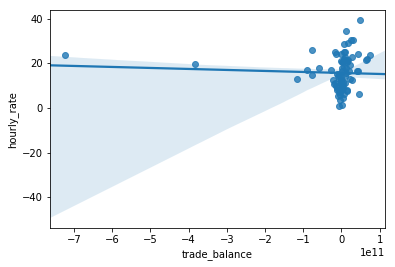

In [226]:
sns.regplot(x='trade_balance', y='hourly_rate', data=final)

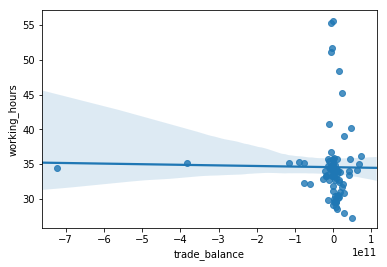

In [227]:
sns.regplot(x='trade_balance', y='working_hours', data=final)

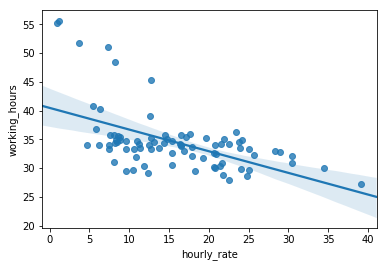

In [225]:
sns.regplot(x='hourly_rate', y='working_hours', data=final)